In [27]:
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
df=pd.read_csv("time.csv")

In [29]:
df=pd.DataFrame(df)



In [30]:
import xgboost as xgb

In [31]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [32]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create additional features like year, month, day, and day of the week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek


In [33]:
# Define the features and target variable
X = df[['year', 'month', 'day', 'day_of_week']]
y = df['consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Create an XGBoost regressor
model = xgb.XGBRegressor(n_estimators=10000,learning_rate=0.001)

# Train the model
model.fit(X_train, y_train,
          eval_set=[(X_train,y_train),(X_test,y_test)],verbose=100)


[0]	validation_0-rmse:294322.99079	validation_1-rmse:296944.20238
[100]	validation_0-rmse:268649.74357	validation_1-rmse:270990.28514
[200]	validation_0-rmse:245582.83502	validation_1-rmse:247797.28280
[300]	validation_0-rmse:224877.40287	validation_1-rmse:227034.62023
[400]	validation_0-rmse:206314.10948	validation_1-rmse:208518.65908
[500]	validation_0-rmse:189698.22104	validation_1-rmse:191966.14360
[600]	validation_0-rmse:174855.52396	validation_1-rmse:177212.22023
[700]	validation_0-rmse:161629.47794	validation_1-rmse:164111.71187
[800]	validation_0-rmse:149858.64170	validation_1-rmse:152629.18923
[900]	validation_0-rmse:139402.31506	validation_1-rmse:142522.17521
[1000]	validation_0-rmse:130145.08279	validation_1-rmse:133670.49537
[1100]	validation_0-rmse:121969.90543	validation_1-rmse:125931.39348
[1200]	validation_0-rmse:114778.74463	validation_1-rmse:119140.88381
[1300]	validation_0-rmse:108470.93309	validation_1-rmse:113261.07432
[1400]	validation_0-rmse:102948.65106	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
features=pd.DataFrame(data=model.feature_importances_,index=model.feature_names_in_)

<Axes: title={'center': 'Features'}>

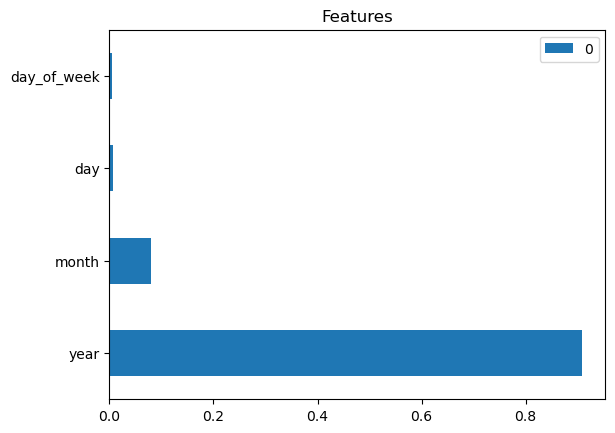

In [36]:
features.plot(kind='barh',title='Features')

In [46]:

future_date = pd.to_datetime('2022-01-01')

# Create features for the future date
future_features = pd.DataFrame({
    'year': [future_date.year],
    'month': [future_date.month],
    'day': [future_date.day],
    'day_of_week': [future_date.dayofweek]
})

# Make predictions for the future date
future_prediction = model.predict(future_features)

print(f"Predicted consumption for {future_date}: {future_prediction[0]:.2f}")

Predicted consumption for 2022-01-01 00:00:00: 3655169.50


In [38]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the DataFrame index
df.set_index('date', inplace=True)

In [39]:
monthly_data = df.resample('M').sum()
print('hello')

hello


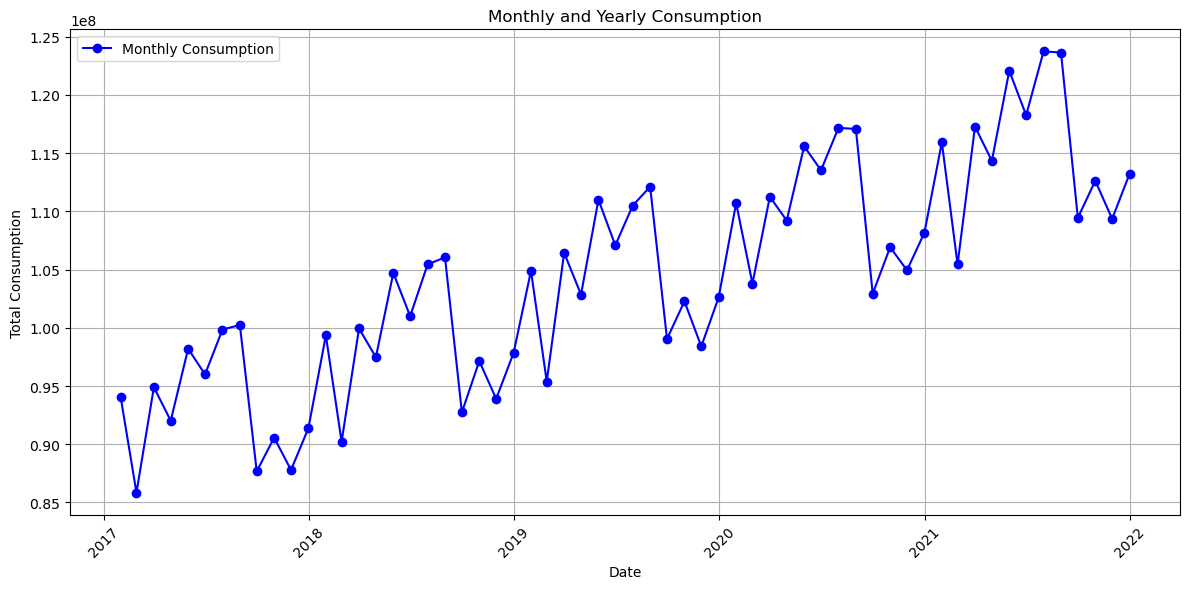

In [40]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the time series data
ax.plot(monthly_data.index, monthly_data['consumption'], marker='o', linestyle='-', color='b', label='Monthly Consumption')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Total Consumption')
ax.set_title('Monthly and Yearly Consumption')
ax.grid(True)
ax.legend()

# Show the plot

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
